In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn_turbostart.estimators import create_estimators
from sklearn_turbostart.train import (
    load_data,
    plot_permutation_importance,
    plot_prediction,
    train_estimators,
)

set_config(display="diagram")

# Load data

In [3]:
X_train, y_train, X_test, y_test = load_data("../data/data.csv")

INFO:sklearn_turbostart.train:Transforming Y to log(Y)
INFO:sklearn_turbostart.train:Splitting data as 80/20


# Preprocessing pipeline

In [4]:
standard_scalar_numerical_columns = [
    "Feature 1",
    "Feature 2",
    "Feature 4",
    "Feature 7",
    "Feature 9",
]
categorical_columns = ["Feature 5", "Feature 6", "Feature 8"]
preprocessing = ColumnTransformer(
    [
        (
            "numeric_standard_scalar",
            StandardScaler(),
            standard_scalar_numerical_columns,
        ),
        ("cat", OneHotEncoder(), categorical_columns),
    ]
)

estimators = create_estimators(preprocessing)

Visualize preprocessing pipeline

In [5]:
preprocessing

ColumnTransformer(transformers=[('numeric_standard_scalar', StandardScaler(),
                                 ['Feature 1', 'Feature 2', 'Feature 4',
                                  'Feature 7', 'Feature 9']),
                                ('cat', OneHotEncoder(),
                                 ['Feature 5', 'Feature 6', 'Feature 8'])])

Visualize model pipeline before fitting

In [6]:
estimators["RandomForest"]

GridSearchCV(cv=5,
             estimator=TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                                             ColumnTransformer(transformers=[('numeric_standard_scalar',
                                                                                                              StandardScaler(),
                                                                                                              ['Feature '
                                                                                                               '1',
                                                                                                               'Feature '
                                                                                                               '2',
                                                                                                               'Feature '
                                                                                                               '4',
                                                                                                               'Feature '
                                                                                                               '7',
                                                                                                               'Feature '
                                                                                                               '9']),
                                                                                                             ('cat',
                                                                                                              OneHotEncoder(),
                                                                                                              ['Feature '
                                                                                                               '5',
                                                                                                               'Feature '
                                                                                                               '6',
                                                                                                               'Feature '
                                                                                                               '8'])])),
                                                                            ('regressor',
                                                                             RandomForestRegressor())]),
                                                  transformer=StandardScaler()),
             param_grid={'regressor__regressor__max_depth': [5, 6, 7, 15],
                         'regressor__regressor__n_estimators': [50, 100, 200]})

# Fit models

Estimator: ElasticNet
Training score: 0.842
Cross-val score: 0.840
Test score: 0.861
----------
Estimator: RandomForest
Training score: 0.912
Cross-val score: 0.851
Test score: 0.879
----------
Estimator: HistGradientBoost
Training score: 0.925
Cross-val score: 0.851
Test score: 0.864
----------


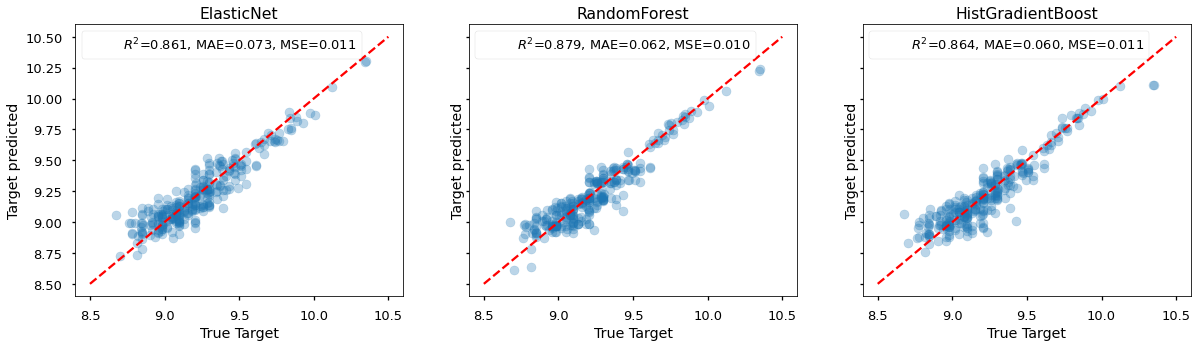

In [8]:
train_estimators(estimators, X_train, y_train, X_test, y_test)

Visualize model pipeline after fitting. Get to know best fit parameters

In [10]:
estimators["RandomForest"].best_estimator_

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('numeric_standard_scalar',
                                                                                       StandardScaler(),
                                                                                       ['Feature '
                                                                                        '1',
                                                                                        'Feature '
                                                                                        '2',
                                                                                        'Feature '
                                                                                        '4',
                                                                                        'Feature '
                                                                                        '7',
                                                                                        'Feature '
                                                                                        '9']),
                                                                                      ('cat',
                                                                                       OneHotEncoder(),
                                                                                       ['Feature '
                                                                                        '5',
                                                                                        'Feature '
                                                                                        '6',
                                                                                        'Feature '
                                                                                        '8'])])),
                                                     ('regressor',
                                                      RandomForestRegressor(max_depth=6,
                                                                            n_estimators=50))]),
                           transformer=StandardScaler())

# Plot feature importance

INFO:sklearn_turbostart.train:['Feature 1', 'Feature 2', 'Feature 4', 'Feature 7', 'Feature 9', 'x0_0', 'x0_1', 'x1_0', 'x1_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 2]
INFO:sklearn_turbostart.train:['Feature 1', 'Feature 2', 'Feature 4', 'Feature 7', 'Feature 9', 'x0_0', 'x0_1', 'x1_0', 'x1_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 2]
INFO:sklearn_turbostart.train:['Feature 1', 'Feature 2', 'Feature 4', 'Feature 7', 'Feature 9', 'x0_0', 'x0_1', 'x1_0', 'x1_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 2]


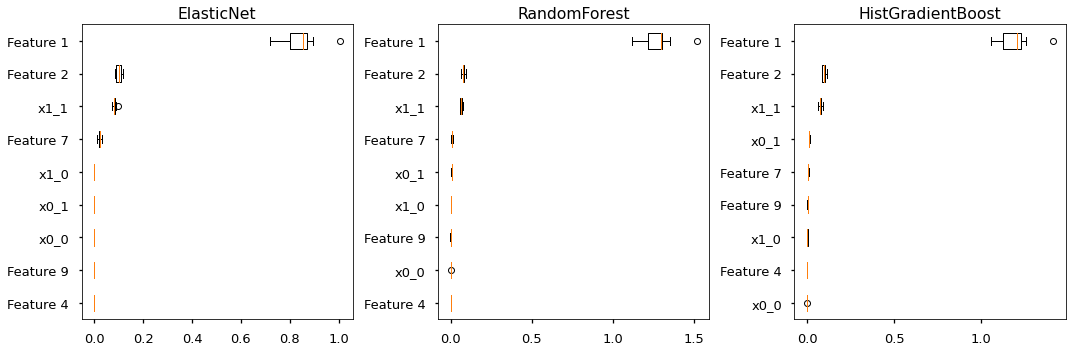

In [13]:
plot_permutation_importance(estimators, X_test, y_test)